## This project is based on recognizing hand written digits and different models used to classify the images.

In [1]:
import numpy as np
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
mnist_csv = np.genfromtxt("mnist_data.csv", delimiter=",")

In [3]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [5]:
y

array([0., 5., 3., ..., 3., 3., 7.])

## Preprocessing:

In [4]:
data = [X_train, X_test, y_train, y_test]
for i in data:
    print(np.isnan(i).sum())

0
0
0
0


## Visualize:

In [153]:
'''
Find the indexes for each digit
'''
for i in range (0,10):
    print(np.where(y == i)[0][0])

0
12
11
2
17
1
9
3
4
7


In [53]:
my_list = [0,0,12,11,2,17,1,9,3,4,7]

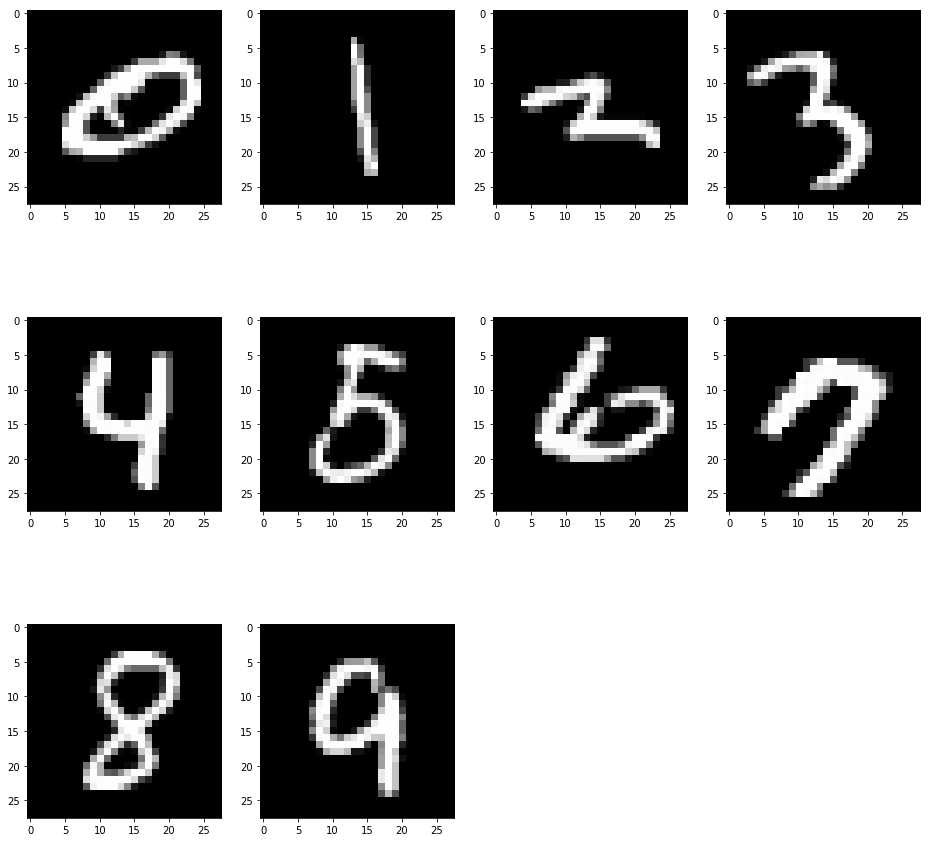

In [54]:
fig=plt.figure(figsize=(16, 16))

for i in range(1,len(my_list)):
    img = (np.reshape(X[my_list[i]], (28, 28)))
    fig.add_subplot(3, 4,i)
    plt.imshow(img, cmap = 'gray')
plt.show()

# Logistic Regression:

In [53]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [54]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
start = time.time()

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
print(f"Train Accuracy:{model.score(X_train,y_train)}")
print(f"Test Accuracy:{model.score(X_test,y_test)}")

end = time.time()

print(end-start)

Train Accuracy:0.9510952380952381
Test Accuracy:0.9029285714285714
10.86273717880249


### b.Reducing the Dimensionality:
After trying different number of components, the test set accuracy seems to be above 90% for `n-component` ranging from about 250-350. The computational time was reduced by less than half compared to non-PCA model.<br>
**Reducing Dimensions:**<br>
PCA reduces the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains **most of the information** in the large dataset. Reducing the number of variables means simplicity in the data but at the expense of reducing the accuracy. Principal components are new variables that are constructed as a linear combinations of mixtures of initial variables. Most of the information from the initial variables is compressed into specified dimensions. Because smaller dataset are easier to explore which is what PCA does by reducing the dimensionality, the computational time is less.<br> 



In [50]:
start = time.time()

my_pca = PCA(n_components=250)
my_pca.fit(X_train)

X_PCA_train = my_pca.transform(X_train)
X_PCA_test = my_pca.transform(X_test)

model.fit(X_PCA_train,y_train)
print(f"Train Accuracy:{model.score(X_PCA_train,y_train)}")
print(f"Test Accuracy:{model.score(X_PCA_test,y_test)}")

end = time.time()

print(f"Time in seconds:{end-start}")

Train Accuracy:0.9282857142857143
Test Accuracy:0.9118571428571428
Time in seconds:5.518723964691162


## c. Advanteges and Disadvantages:

### Reducing Dimensionality:<br>
**Advantage:** The main advantage is to reduce the computation time in case of large datasets and reflecting intuition about the data. If the dataset is too large and we need to get the idea about the fit of the model, then reducing dimensinality will give us quicker results probably at the expense of less accuracy but also with some intuition about the data.<br>
**Disadvantage:** Reducing dimensionality may lead to some data loss. PCA uses variance as a measure to select the dimension. Featuers with higher variance are treated as principle components and with less variance noise. If the mean and covariance is not enough to define dataset, PCA will not provide sensible results.<br>



# KNN_model 

KNN searches the memorized training observations for the K instances that most closely resemble the new instance and assigns it to their most common class. For K = 1, the accuracy on the train set is 100% and test set is 93%.<br> 
When K = 1, the model finds the nearest point to the unseen data (or our test data) and classifies the unseen data to the class of the trainig point and since the accuracy score for the test set is 93% we can say the model is fairly good at predicting the unseen data and generalizing the data.<br>
When k = 21000(which is a length of the training data set) we are adding bias term to the model and forcing the model to draw smoother decision boundaries avoiding variance and oversimplifying the data. The model will classify point with 21000 nearest points which is basically 1 class with the highest number of points. In this case as I have shown below the class proportions, class 1 makes up for 11% of the total training points and test points as well which is why the accuracy is 11% for training set and test set becasue the model was only able to classify Class 1 points correctly.

In [13]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
KNN_model = KNeighborsClassifier(n_neighbors = 1)
KNN_model.fit(X_train,y_train)

print(KNN_model.score(X_train,y_train))
print(KNN_model.score(X_test,y_test))

1.0
0.9309285714285714


In [50]:
len(X_train)

21000

**CLASS CONTRIBUTIONS**

In [42]:
'''
Class 1 has the highest portion of samples, hence the train and test accuracy matches the portion of that class when
k = 21000.
'''
for i in range(0,10):
    print(i,len(np.where(y_train == i)[0])/len(y_train))

0 0.09876190476190476
1 0.11038095238095239
2 0.09914285714285714
3 0.10276190476190476
4 0.098
5 0.09185714285714286
6 0.09838095238095237
7 0.10576190476190477
8 0.097
9 0.09795238095238096


In [51]:
KNN_model = KNeighborsClassifier(n_neighbors = 21000)
KNN_model.fit(X_train,y_train)

print(KNN_model.score(X_train,y_train))
print(KNN_model.score(X_test,y_test))

0.11038095238095239
0.11035714285714286


## b. Ideal number of K:

For K = 1, the accuracy for test result was 93% so I decided to explore first 20 values for K since the accuracy was very high to begin with. The ideal K semms to be 2 as the the train and test set accuracy converge then starts dropping. Usually when K is smaller there is a chance of model overfitting but since the test result shows better accuracy at K = 2, model is a better fit.

In [5]:
my_pca = PCA(n_components=250)
my_pca.fit(X_train)

X_PCA_train = my_pca.transform(X_train)
X_PCA_test = my_pca.transform(X_test)

test_score = []
train_score = []
k = []
for i in range(1,20):
    KNN_model = KNeighborsClassifier(n_neighbors = i)
    KNN_model.fit(X_train,y_train)
    test_score.append(KNN_model.score(X_test,y_test))
    train_score.append(KNN_model.score(X_train,y_train))
    k.append(i)
print(test_score)

[0.9297142857142857, 0.9173571428571429, 0.9302142857142857, 0.928, 0.9289285714285714, 0.928, 0.9292857142857143, 0.9274285714285714, 0.9263571428571429, 0.9259285714285714, 0.9244285714285714, 0.9234285714285714, 0.923, 0.9208571428571428, 0.9207857142857143, 0.9195, 0.9194285714285715, 0.9187857142857143, 0.9176428571428571]


In [8]:
np.argmax(test_score)

2

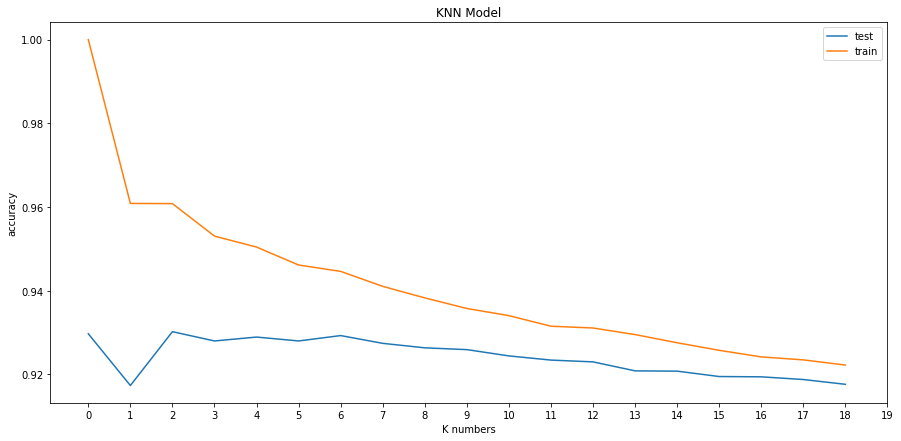

In [9]:
plt.figure(figsize=[15,7])
plt.plot(test_score, label = 'test')
plt.plot(train_score, label = 'train')
plt.title('KNN Model')
plt.xlabel('K numbers')
plt.xticks(range(0,20))
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Model Fitting:<br>
As we can see the result of decision tree, different `max_depth` values have been fed to the model. The max_depth value defines how much you are allowing a model to grow. If default value for `max_depth` is none then it will expand the nodes until all leaves are pure in which case we overfit the model to the data. The graph below shows for different `max_depth` values the accuracy score for the model. At the max_depth=15, the model reahces its maximum accuracy on the test set and then stays pretty much steady as it can not classify more because probably there is no more samples left to classify.

In [33]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [34]:
test_score = []
train_score = []
depth = []
for i in range(1,20):
    DT_model = DecisionTreeClassifier(max_depth = i,random_state = 1)
    DT_model.fit(X_train, y_train)
    test_score.append(DT_model.score(X_test,y_test))
    train_score.append(DT_model.score(X_train,y_train))
    depth.append(i)

In [35]:
np.argmax(test_score)

13

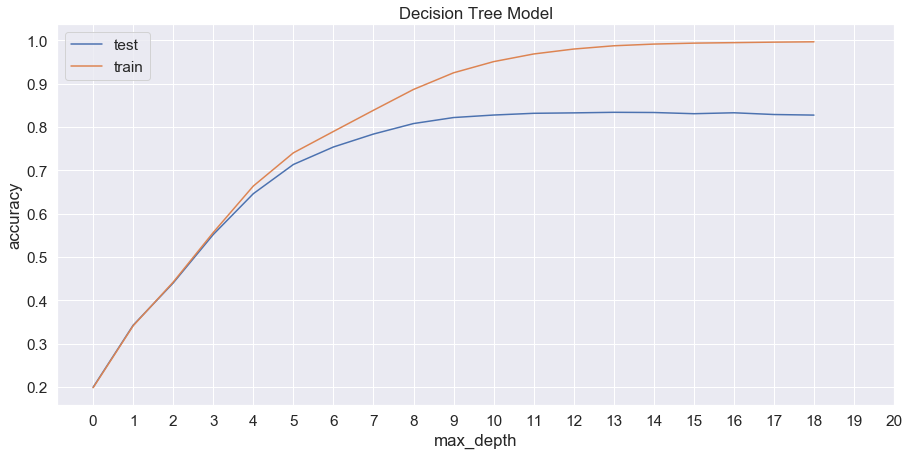

In [36]:
plt.figure(figsize=[15,7])
plt.plot(test_score, label = 'test')
plt.plot(train_score, label = 'train')
plt.title('Decision Tree Model')
plt.xlabel('max_depth')
plt.xticks(range(0,21))
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [38]:
DT_model = DecisionTreeClassifier(max_depth = 13,random_state = 1)
DT_model.fit(X_train, y_train)
print(f"Score on train:{DT_model.score(X_train,y_train)}")
print(f"Score on test:{DT_model.score(X_test,y_test)}")

Score on train:0.9798571428571429
Score on test:0.8326428571428571


## Model Evaluation:<br>

For model evaluation, we will looked at model accuracy but the other metrics we can look at is Confusion Matrix which has been shown below. Rows in the matrix tells us the False negative results for that particular class. For example, model predicted 1249 images as 'class 0' out of actual 1383 images belonging to 0 which comes to about 134 images being misclassified as different class hence FlaseNegative. Similarly the columns tells us the predicted values for the respective classes and False Positive results. Model captured 135(1384-1249) images as class 0 but they weren't hence FalsePositive.<br>

As the precision and recall heatmap shows, the precision values range from 77% to 90%. Higher precision is better, meaning high chances of what our model predicts is actually true. Recall indicates what is the chance that model will correctly classify images in the respective classes.  Classes 9,5 & 8 have less percentage precision compared to other classes. We should also look at Recall and F1 score. F1 score takes into account both precision and recall hence a better measure. Mean F1 score for the model is 0.83. Although the model is not terrible, other models performed better so far.

In [39]:
y_predict = DT_model.predict(X_test)

In [40]:
df =pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

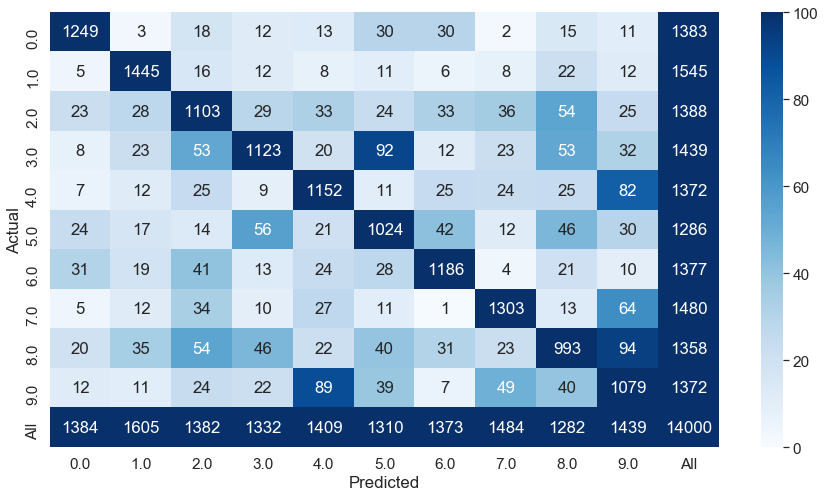

In [41]:
plt.figure(figsize = [15,8])
sns.set(font_scale=1.4)
sns.heatmap(df,cmap = 'Blues',vmax = 100, vmin = 0,annot=True, fmt = 'g');

In [42]:
print ('\n*Classification Report:\n', classification_report(y_test, y_predict))


*Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      0.90      0.90      1383
         1.0       0.90      0.94      0.92      1545
         2.0       0.80      0.79      0.80      1388
         3.0       0.84      0.78      0.81      1439
         4.0       0.82      0.84      0.83      1372
         5.0       0.78      0.80      0.79      1286
         6.0       0.86      0.86      0.86      1377
         7.0       0.88      0.88      0.88      1480
         8.0       0.77      0.73      0.75      1358
         9.0       0.75      0.79      0.77      1372

   micro avg       0.83      0.83      0.83     14000
   macro avg       0.83      0.83      0.83     14000
weighted avg       0.83      0.83      0.83     14000



## Lets see the classification report with seaborn heatmap.

In [43]:
'''
Defining function to calculate F1 score, Precicion and Recall
'''
def report(dataframe):
    recall_data = []
    precision_data = []
    for i in range(0,10):
        value = (dataframe.iloc[:,i][i]/dataframe['All'][i])
        recall_data.append(value)

        another = (dataframe.iloc[:,i][i]/dataframe.iloc[10,:][i])
        precision_data.append(another)


    table = pd.DataFrame()
    table.insert(loc = 0,value = recall_data, column = 'Recall')
    table.insert(loc = 0,value = precision_data, column = 'Precision')

    table['F1_score']=2*(table['Precision']*table['Recall']/(table['Precision']+table['Recall']))

    

    plt.figure(figsize = [12,8])
    sns.heatmap(table.sort_values(by = 'F1_score',ascending = False),annot = True, linewidths = 1,
                cmap = 'bwr')
    plt.show()
    
    print(table['F1_score'].mean())

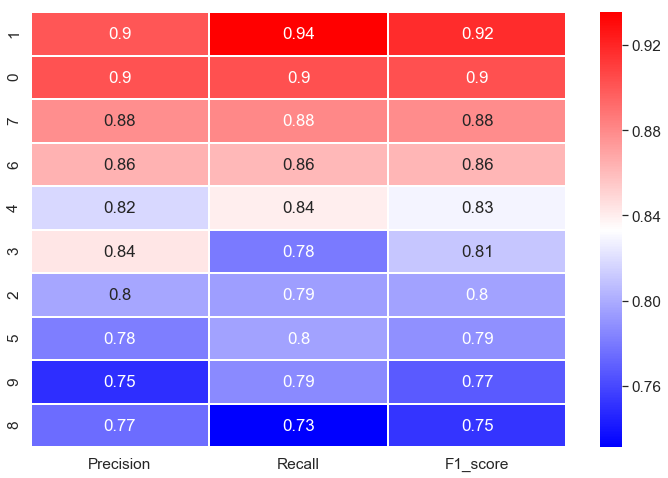

0.8306289475843471


In [44]:
report(df)


## Logistic Regression with 5K Fold cross-validation:<br>

I decided to use the default Ridge regularization and tune weights of the pixels. We have 784 columns each representing a pixel value. The data consists of handwritten digits by different people. Since every person has different handwriting, we must have picked up some noise in the dataset which is represented by pixels. So by tuning the weights of the pixels we are trying to reduce the noise in the pixels and make our model to generalize. We need our model to predict better on unseen images.    

In [16]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]


X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size=0.4, stratify = y)

In [17]:
scaler = StandardScaler()
scaler.fit(X_valid)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [18]:
score_list = []
cost_range = [10**i for i in range(-5,5)]
              
for i in cost_range:
    log_reg = LogisticRegression(C = i, solver = 'lbfgs')
    log_reg.fit(X_valid,y_valid)
    score_list.append(np.mean(cross_val_score(log_reg, X_valid, y_valid, cv = 5)))
print(score_list)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/anaconda3

[0.775953197024305, 0.862570554502651, 0.8990471688664728, 0.9101906690292898, 0.9095233210853377, 0.8995243332400434, 0.8902392023314055, 0.885810196624249, 0.8847143791010836, 0.8841437211762809]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [19]:
cost_range

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

In [20]:
cost_range[np.argmax(score_list)]

0.01

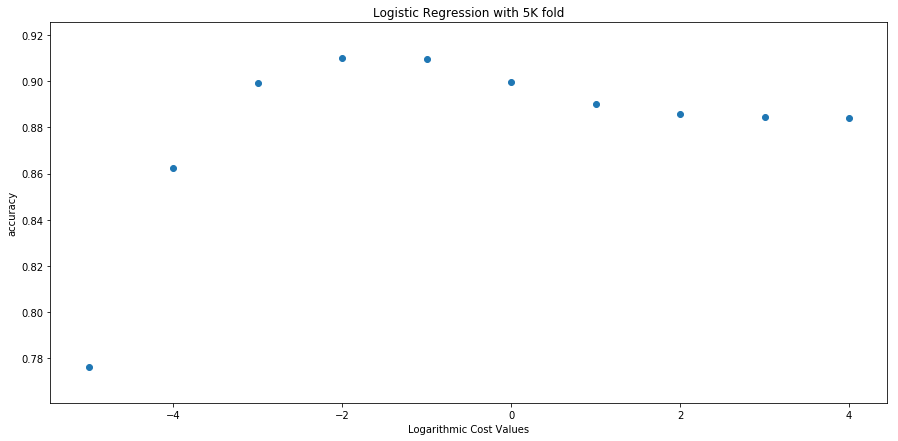

In [21]:
plt.figure(figsize=[15,7])
plt.scatter(np.log10(cost_range),score_list)
plt.title('Logistic Regression with 5K fold')
plt.xlabel('Logarithmic Cost Values')
plt.ylabel('accuracy')
plt.show()

In [27]:
reg = LogisticRegression(C = 0.01, solver = 'lbfgs')
log_reg.fit(X_valid,y_valid)
print(log_reg.score(X_valid,y_valid))

y_predict = log_reg.predict(X_test)

0.9532857142857143


##  Confusion Matrix:

The confusin matrix and F1 score table is shown below. This model is definitely better than decision tree. The confusion matrix follows similar pattern as of Decision tree matrix. As we can see in the confusion matrix along the diagonal, the number of true predictions per class. But we also have to take into account the proportions of each class and that is why we look at Precision,Recall and f1 score. As the classification report heatmap shows, the model is weak at predicting images of 5,9 and 8 digits and strong at predicting images of 0,1,7 and 6 digits. The higher the precision, recall and f1 score values, the better our model is. <br>
Aside from digonal elemnts which are called **true positives** meaning model classified them correctly, rows in the matrix represent **false negatives** meaning the image originally belonged to the row class but our model failed to classify it accurately. Similarly columns represent **false Positives** meaning model classified the image as the column class but it was not.<br>  
The model accuracy is imporved along with less False Positives, Flase negatives and more true positives compared to DT model. Mean f1 score is 0.89.

In [28]:
confusion =pd.crosstab(y_test, y_predict, rownames=['Actual'], colnames=['Predicted'], margins=True)

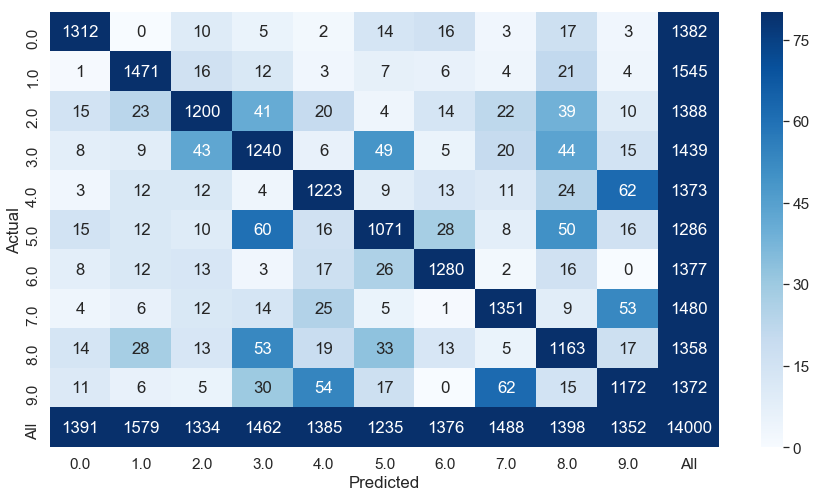

In [29]:
plt.figure(figsize = [15,8])
sns.set(font_scale=1.4)
sns.heatmap(confusion,cmap = 'Blues',vmax = 80, vmin = 0,annot=True, fmt = 'g');

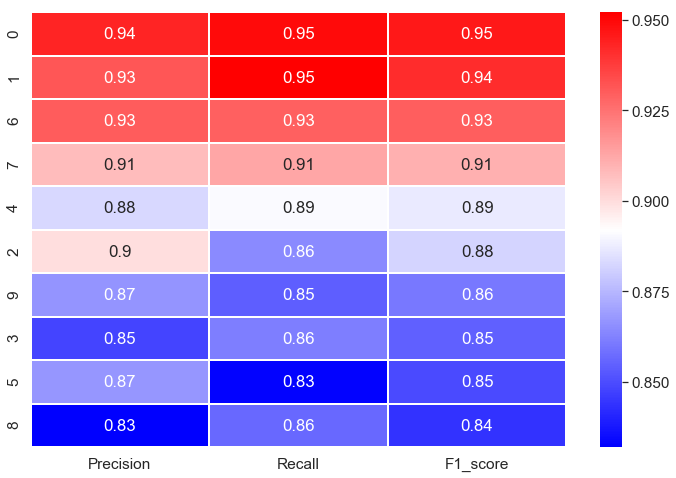

0.8905876636393811


In [32]:
report(confusion)

In [3]:
X = mnist_csv[:, :-1]
y = mnist_csv[:, -1]

In [4]:
nine = (np.where(y == 9)[0]) 
four = (np.where(y == 4)[0])

In [5]:
array = np.concatenate((four,nine))

In [6]:
array.shape

(6860,)

In [7]:
x = []
for i in range(0,len(array)):
    x.append(X[array[i]])

In [8]:
x = np.array(x)

In [9]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
array

array([   17,    19,    27, ..., 34975, 34988, 34990])

In [11]:
new_y = []
for i in range(0,len(array)):
    new_y.append(y[array[i]])

In [12]:
new_y = np.array(new_y)
new_y.shape

(6860,)

In [13]:
len(new_y == 9)

6860

In [14]:
new_y = np.where(new_y == 4,0,1)

In [15]:
new_y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
x.shape

(6860, 784)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, new_y, test_size=0.2, stratify = new_y)

In [19]:
log_reg = LogisticRegression(C = 1, solver = 'lbfgs')
log_reg.fit(X_train,y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
y_predict = log_reg.predict(X_test)

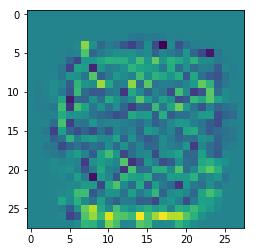

In [21]:
plt.imshow(np.reshape(log_reg.coef_,(28,28)));

Thr weights of our logistic regression model image is shown above. The blue portion of the image indicates that they don't contribute much in identifying the image or they dont play vital role in differentiating 4s and 9s. The yellow-green pixels contribute more in the identification of 4s and 9s. The bottom and top of the image especially with high density of yellow pixels is what differetiates 4 from 9 which makes sense because 4 does not have curves in the bottom and top but 9 does. 